In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

In [2]:
plt.style.use("dstyle")
_ = plt.figure()
plt.style.use("dstyle")

<Figure size 3000x2400 with 0 Axes>

In [3]:
MPC_CGS     = 3.0857e24
KM_CGS      = 1.e5
GYRS_CGS    = 3.1536e16

H0_Concordance = 70.
H0_DESI = 67.66
H0_Pantheon = 68.03
H0_Union3 = 66.53
H0_DESY5 = 67.24

H0_cgs_Concordance = H0_Concordance * (KM_CGS / MPC_CGS)
H0_cgs_DESI = H0_DESI * (KM_CGS / MPC_CGS)
H0_cgs_Pantheon = H0_Pantheon * (KM_CGS / MPC_CGS)
H0_cgs_Union3 = H0_Union3 * (KM_CGS / MPC_CGS)
H0_cgs_DESY5 = H0_DESY5 * (KM_CGS / MPC_CGS)

In [4]:
table_fname_Concordance = "integration_tables/table_Concordance.txt"
table_fname_DESI = "integration_tables/table_DESI.txt"
table_fname_Pantheon = "integration_tables/table_Pantheon.txt"
table_fname_Union3 = "integration_tables/table_Union3.txt"
table_fname_DESY5 = "integration_tables/table_DESY5.txt"

nskiprows = 10

table_Concordance = np.loadtxt(table_fname_Concordance, skiprows=nskiprows, delimiter = ',')
table_DESI = np.loadtxt(table_fname_DESI, skiprows=nskiprows, delimiter = ',')
table_Pantheon = np.loadtxt(table_fname_Pantheon, skiprows=nskiprows, delimiter = ',')
table_Union3 = np.loadtxt(table_fname_Union3, skiprows=nskiprows, delimiter = ',')
table_DESY5 = np.loadtxt(table_fname_DESY5, skiprows=nskiprows, delimiter = ',')

In [5]:
z_arr = table_Concordance[:,0]
l_z_arr = table_Concordance[:,1]
a_arr = table_Concordance[:,2]

time_look_Concordance = table_Concordance[:,3]
time_age_Concordance = table_Concordance[:,4]
time_ageGyr_Concordance = time_age_Concordance / H0_cgs_Concordance / GYRS_CGS

time_look_DESI = table_DESI[:,3]
time_age_DESI = table_DESI[:,4]
time_ageGyr_DESI = time_age_DESI / H0_cgs_DESI / GYRS_CGS

time_look_Pantheon = table_Pantheon[:,3]
time_age_Pantheon = table_Pantheon[:,4]
time_ageGyr_Pantheon = time_age_Pantheon / H0_cgs_Pantheon / GYRS_CGS

time_look_Union3 = table_Union3[:,3]
time_age_Union3 = table_Union3[:,4]
time_ageGyr_Union3 = time_age_Union3 / H0_cgs_Union3 / GYRS_CGS

time_look_DESY5 = table_DESY5[:,3]
time_age_DESY5 = table_DESY5[:,4]
time_ageGyr_DESY5 = time_age_DESY5 / H0_cgs_DESY5 / GYRS_CGS

In [6]:
strlabel_LCDM = r"$\Lambda$ CDM"
strlabel_DESI = "DESI+CMB"
strlabel_Pantheon = "DESI+CMB+Pantheon"
strlabel_DESY5 = "DESI+CMB+DESY5"
strlabel_Union3 = "DESI+CMB+Union3"

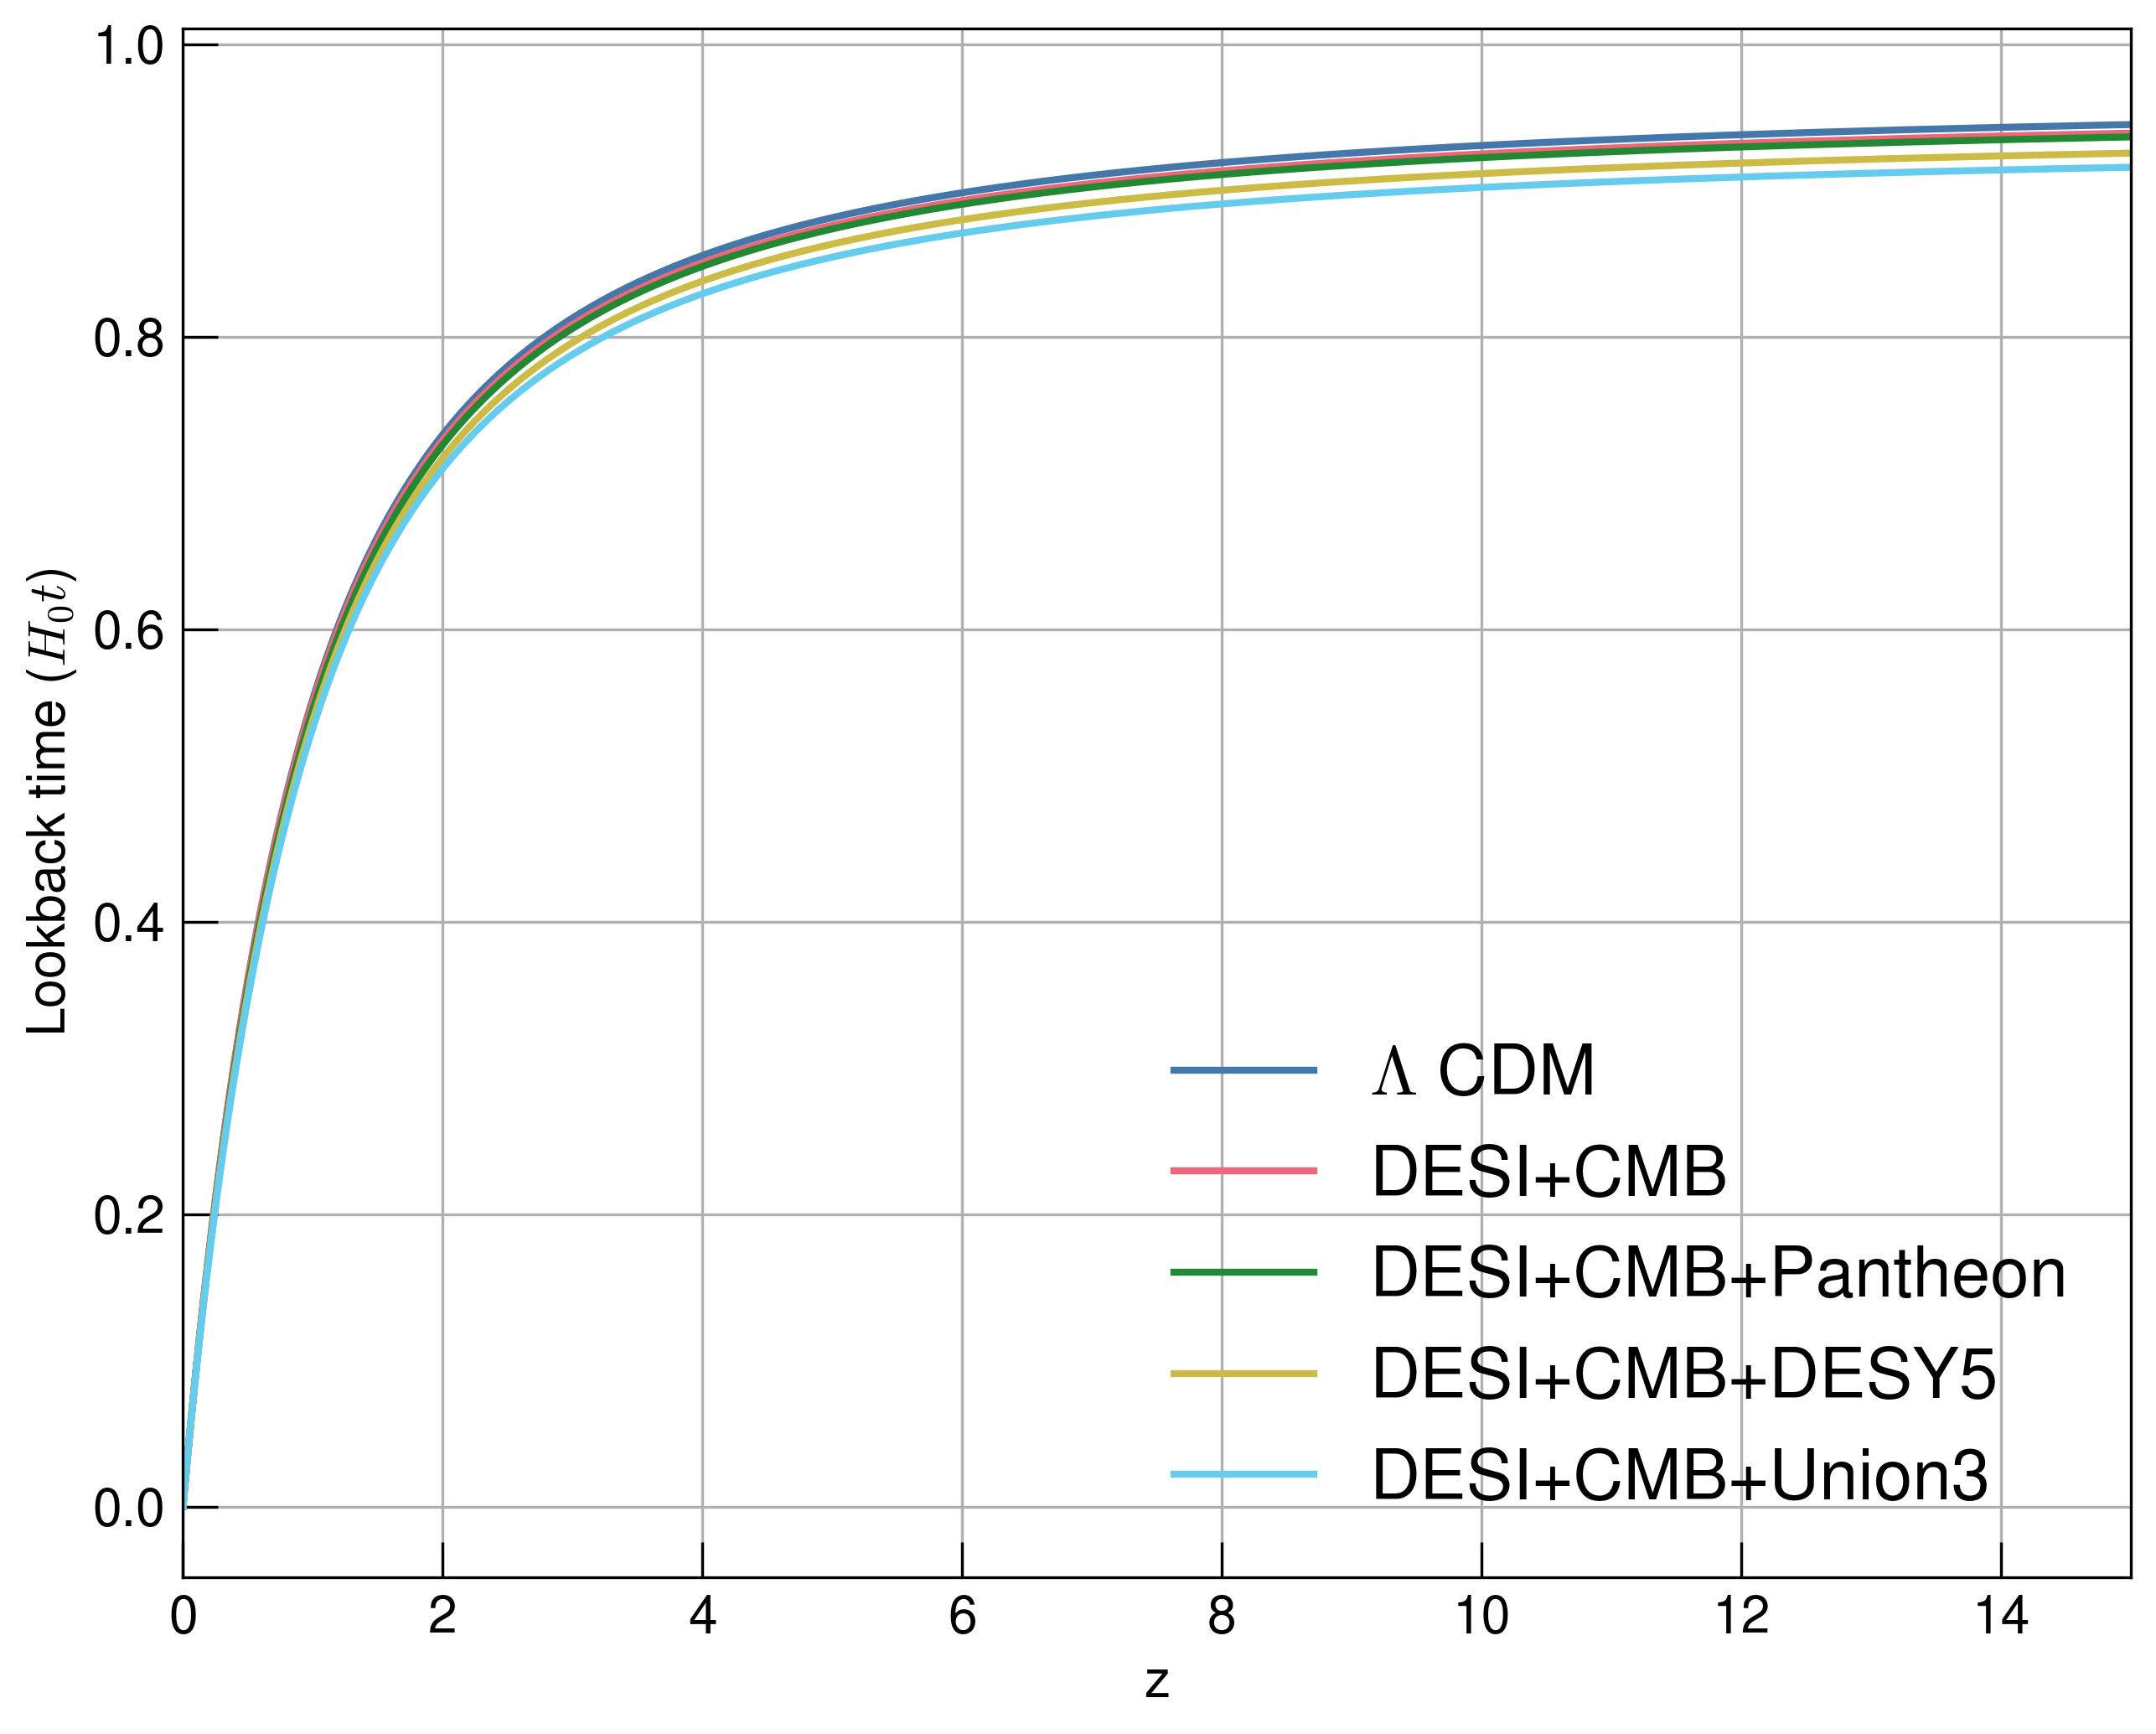

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=1)

ax.plot(z_arr, time_look_Concordance, label=strlabel_LCDM, lw=2)
ax.plot(z_arr, time_look_DESI, label=strlabel_DESI, lw=2)
ax.plot(z_arr, time_look_Pantheon, label=strlabel_Pantheon, lw=2)
ax.plot(z_arr, time_look_DESY5, label=strlabel_DESY5, lw=2)
ax.plot(z_arr, time_look_Union3, label=strlabel_Union3, lw=2)

ax.set_xlabel("z")
ax.set_ylabel(r"Lookback time ($H_0 t$)")

ax.grid()

ax.set_xlim(0,15)

plt.legend()

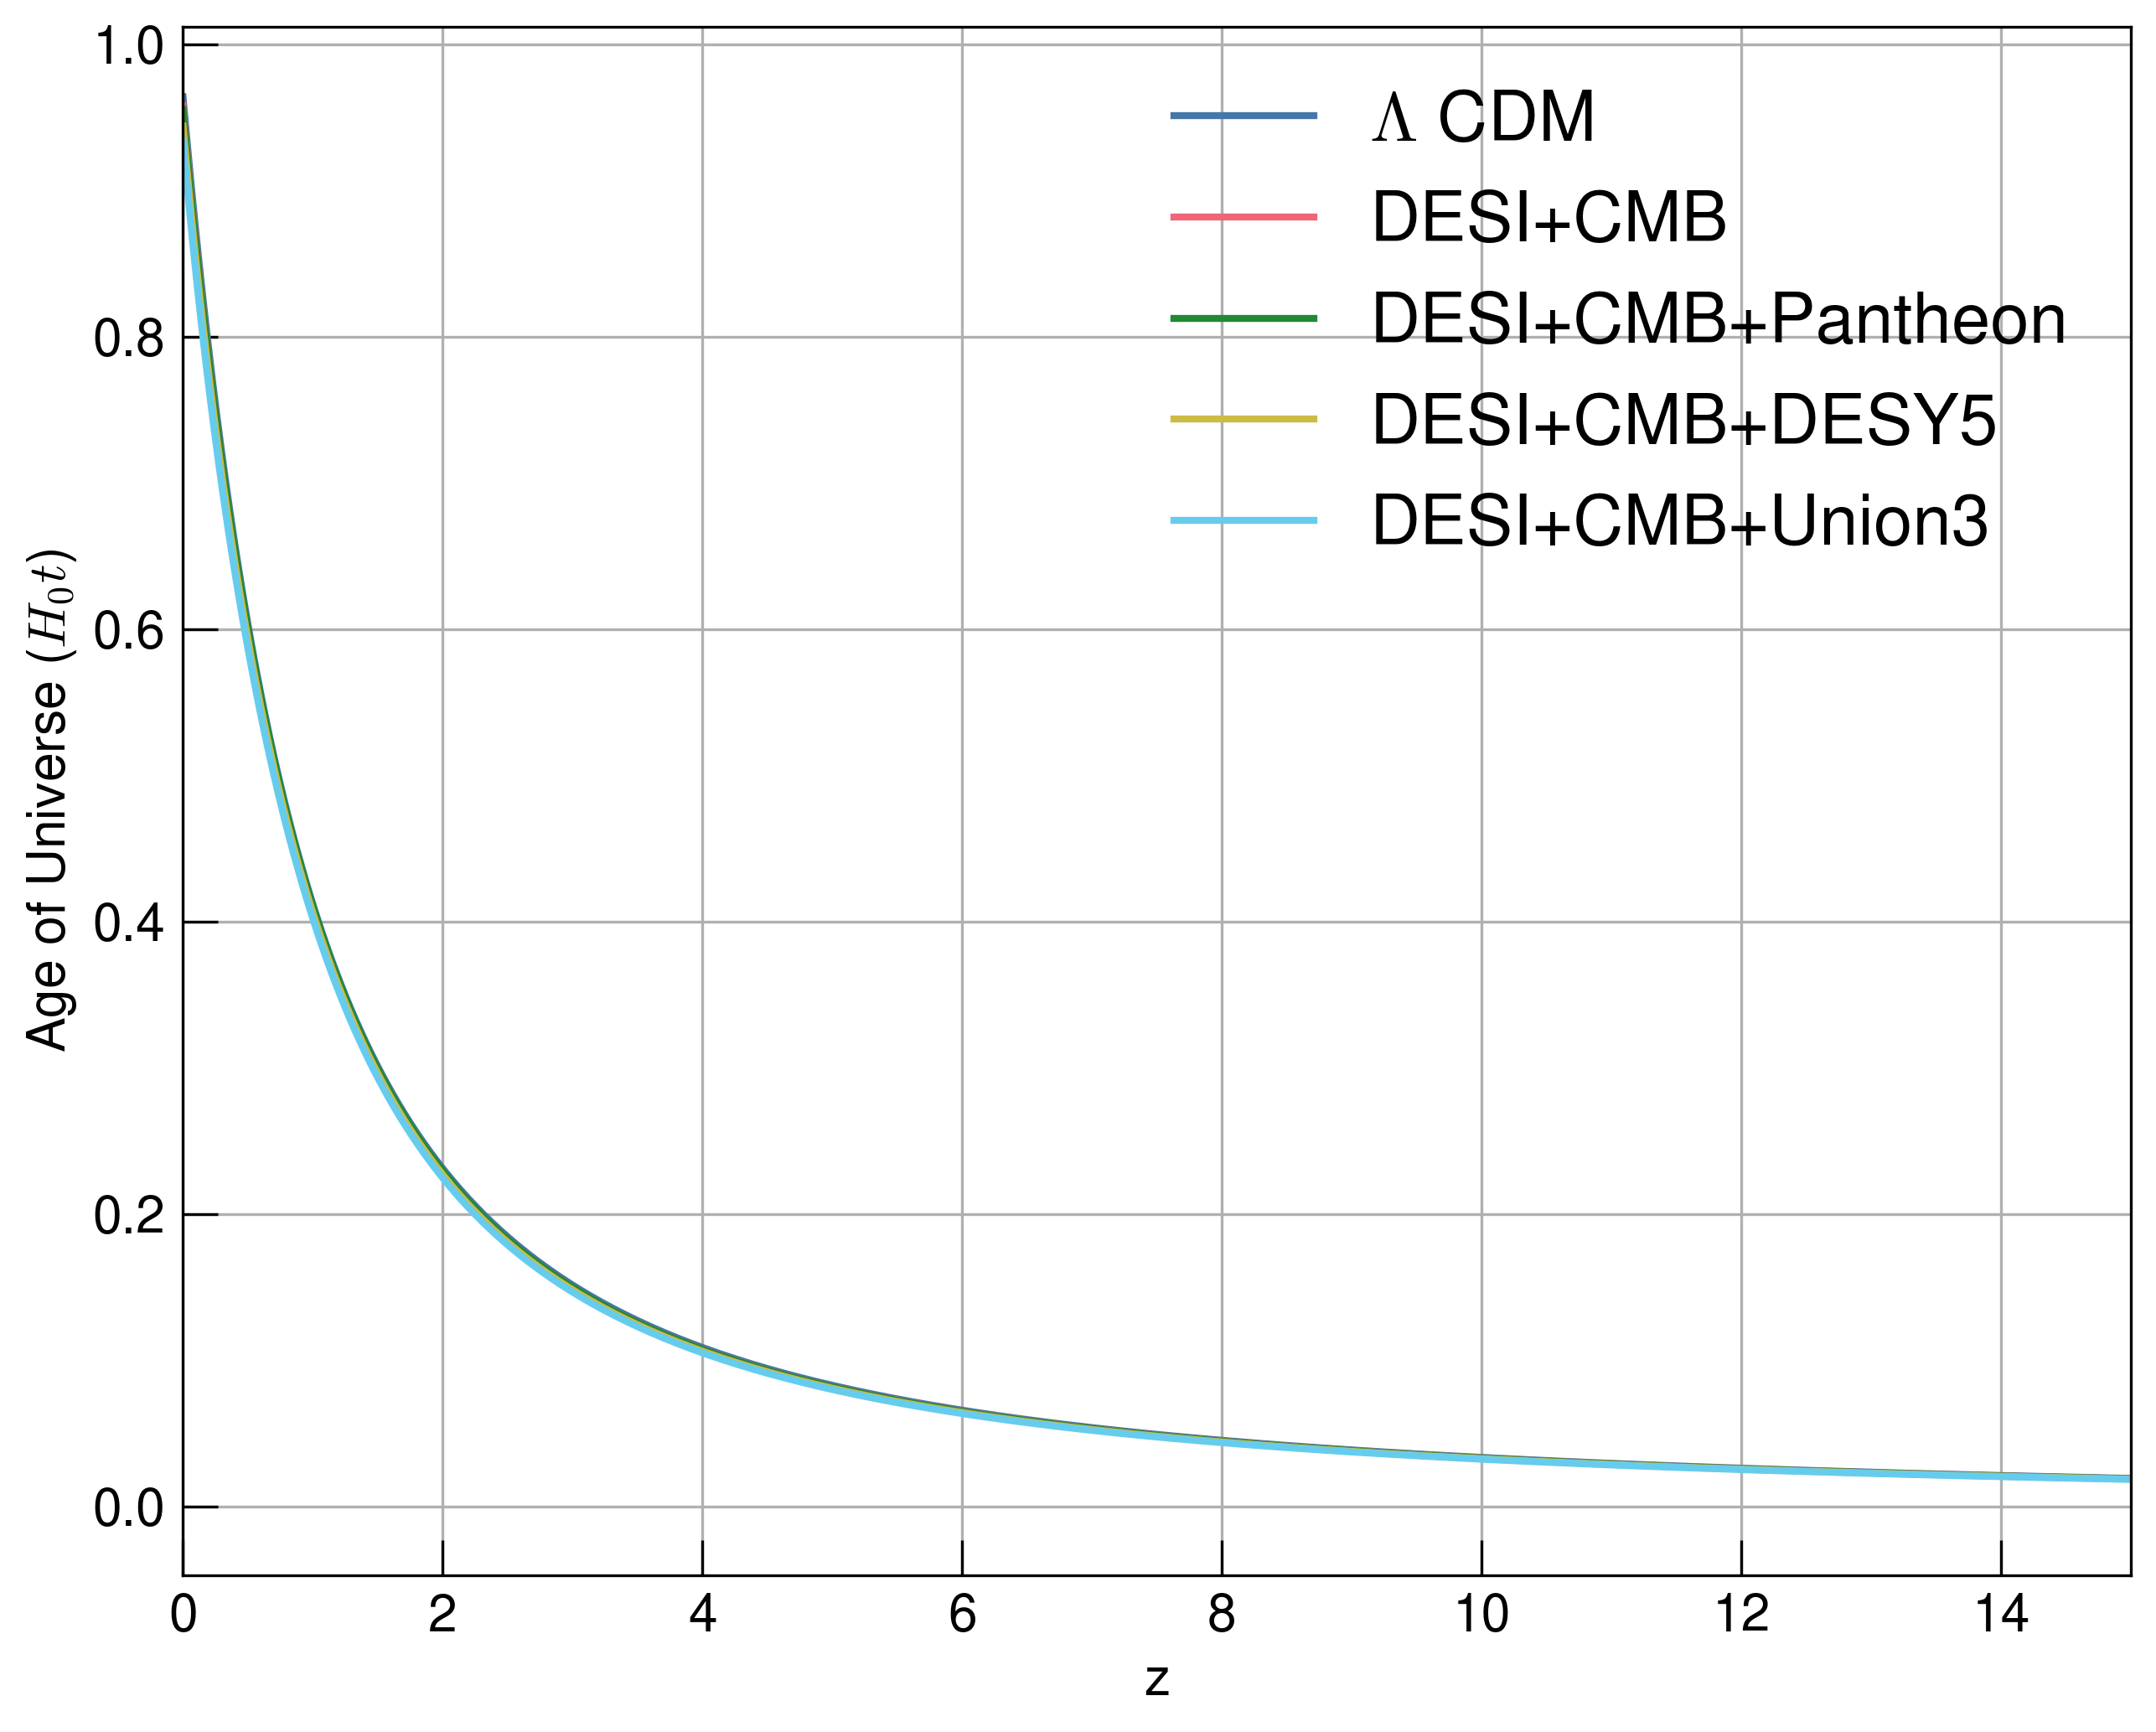

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=1)

ax.plot(z_arr, time_age_Concordance, label=strlabel_LCDM, lw=2)
ax.plot(z_arr, time_age_DESI, label=strlabel_DESI, lw=2)
ax.plot(z_arr, time_age_Pantheon, label=strlabel_Pantheon, lw=2)
ax.plot(z_arr, time_age_DESY5, label=strlabel_DESY5, lw=2)
ax.plot(z_arr, time_age_Union3, label=strlabel_Union3, lw=2)

ax.set_xlabel("z")
ax.set_ylabel(r"Age of Universe ($H_0 t$)")

ax.grid()

ax.set_xlim(0,15)

plt.legend()

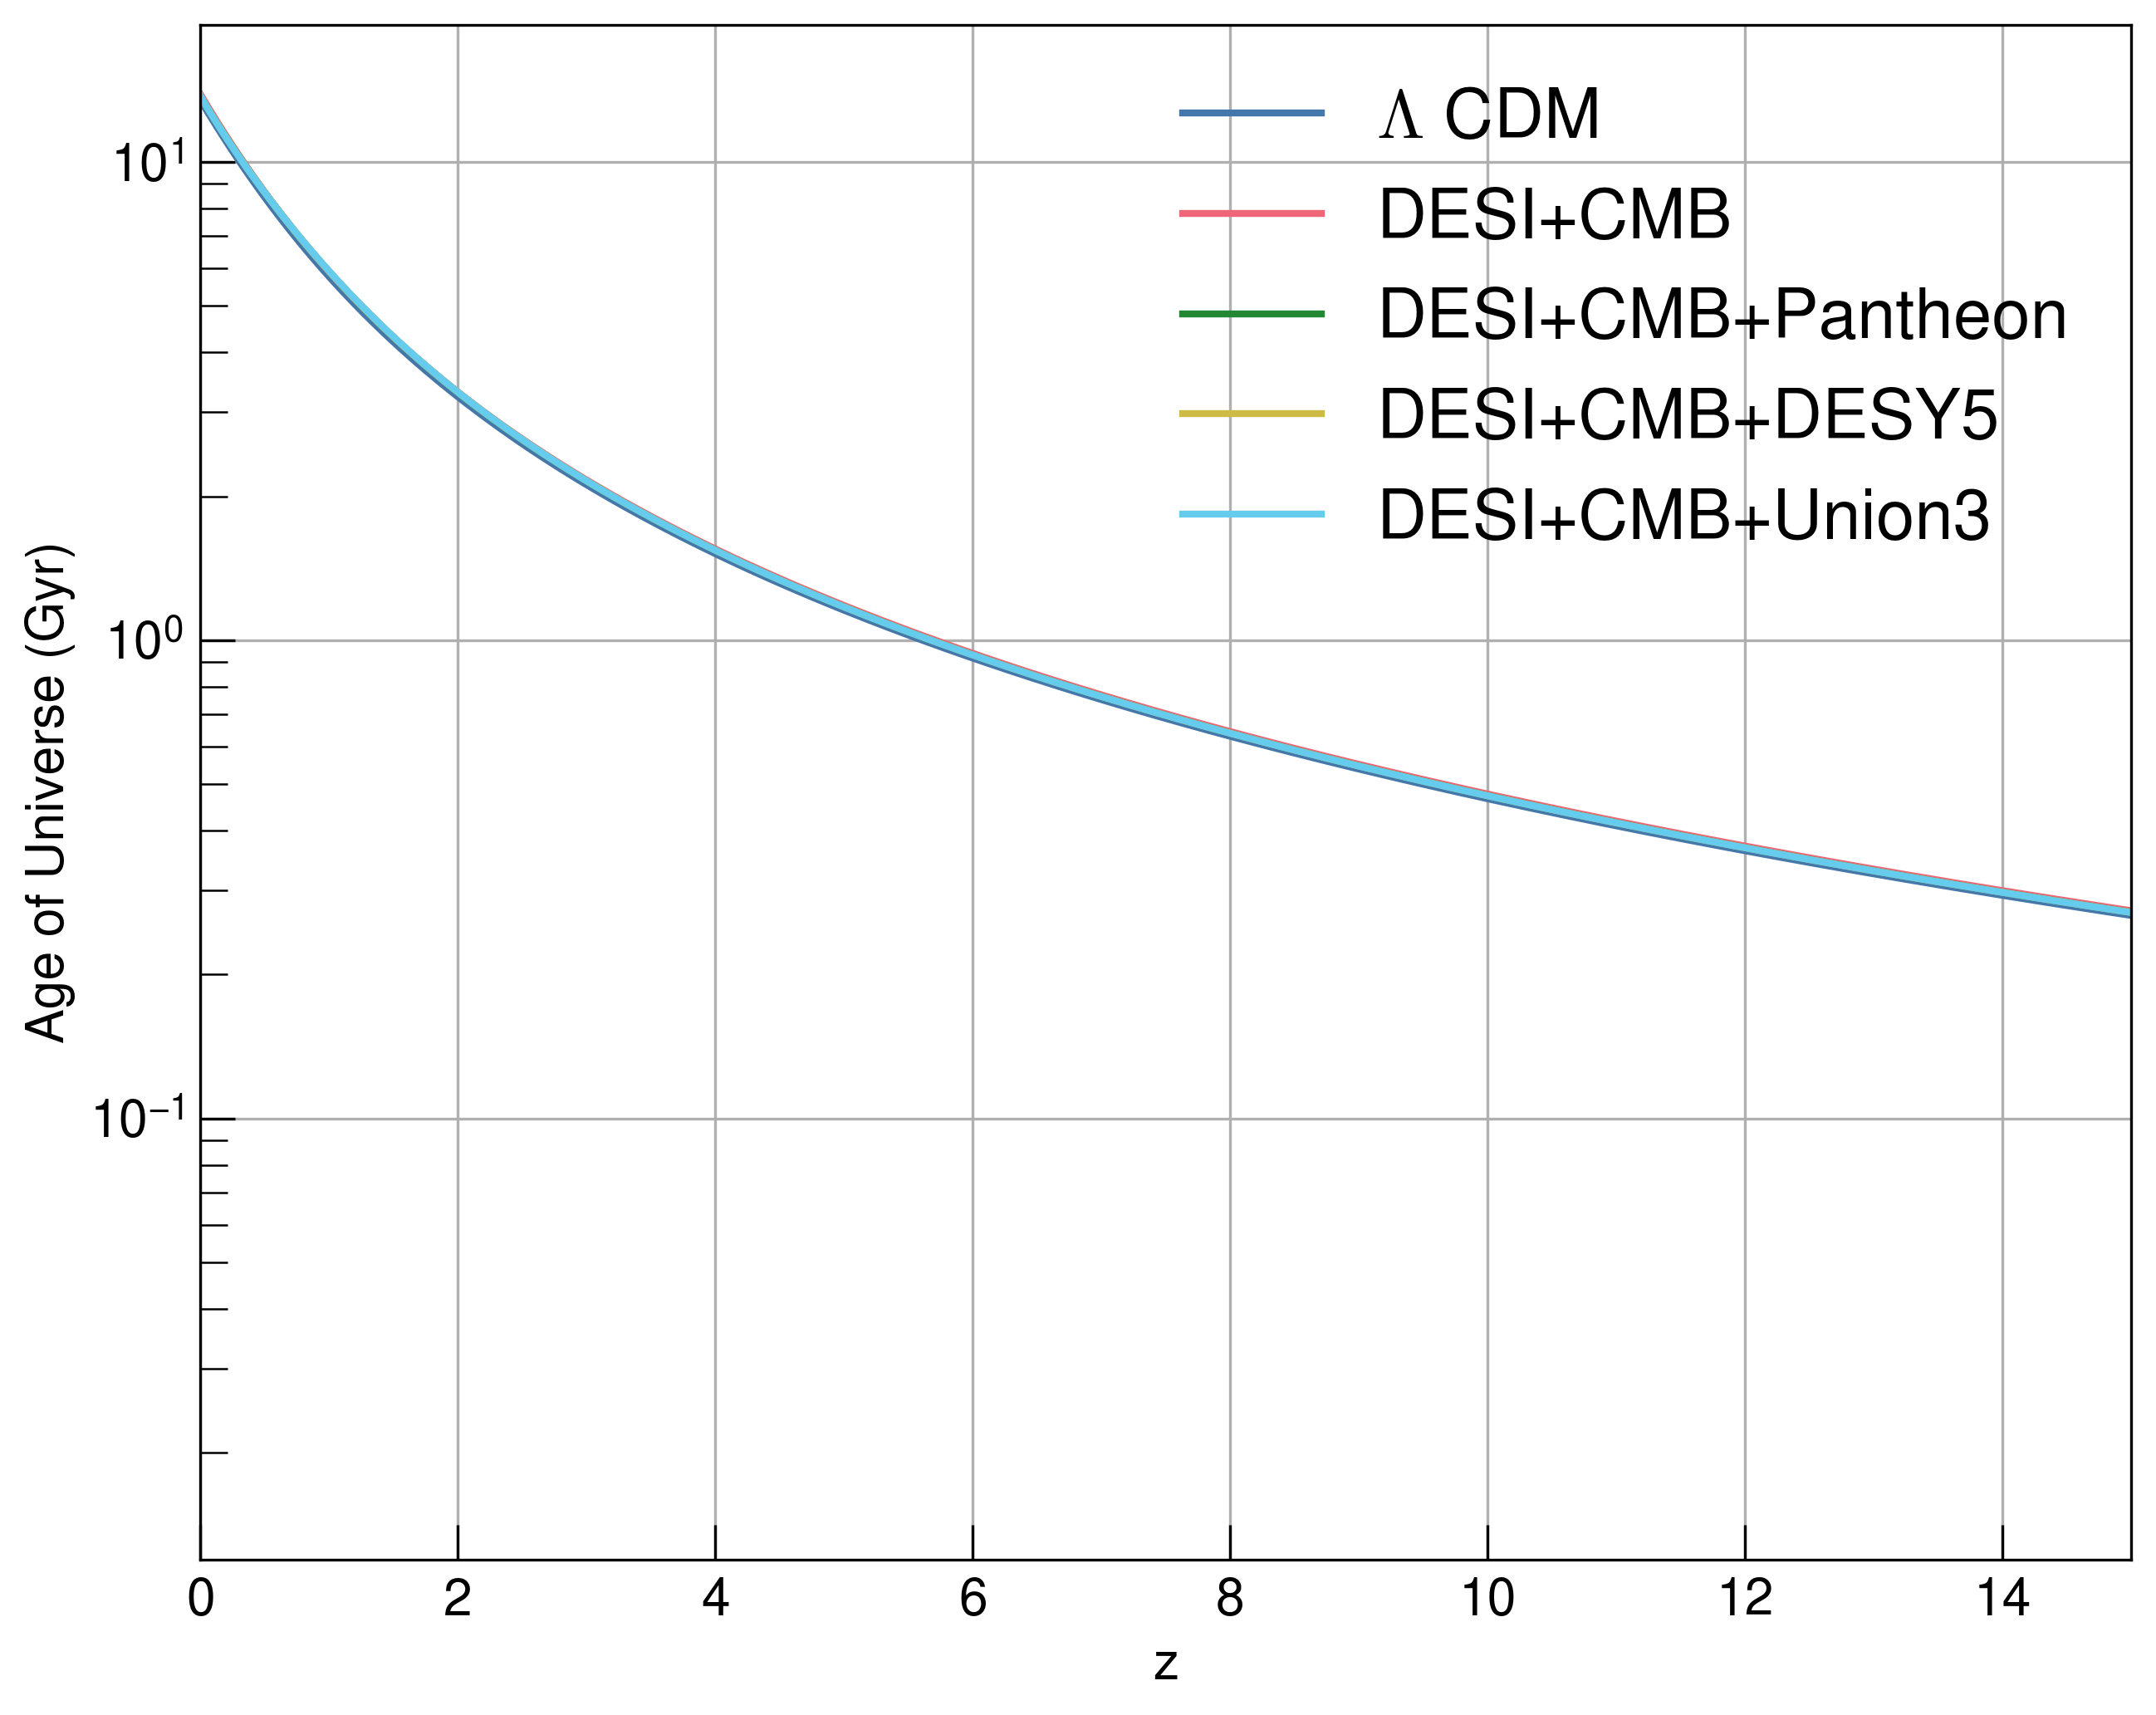

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=1)

ax.plot(z_arr, time_ageGyr_Concordance, label=strlabel_LCDM, lw=2)
ax.plot(z_arr, time_ageGyr_DESI, label=strlabel_DESI, lw=2)
ax.plot(z_arr, time_ageGyr_Pantheon, label=strlabel_Pantheon, lw=2)
ax.plot(z_arr, time_ageGyr_DESY5, label=strlabel_DESY5, lw=2)
ax.plot(z_arr, time_ageGyr_Union3, label=strlabel_Union3, lw=2)

ax.set_xlabel("z")
ax.set_ylabel(r"Age of Universe (Gyr)")

ax.set_yscale('log')

ax.grid()

ax.set_xlim(0,15)

plt.legend()

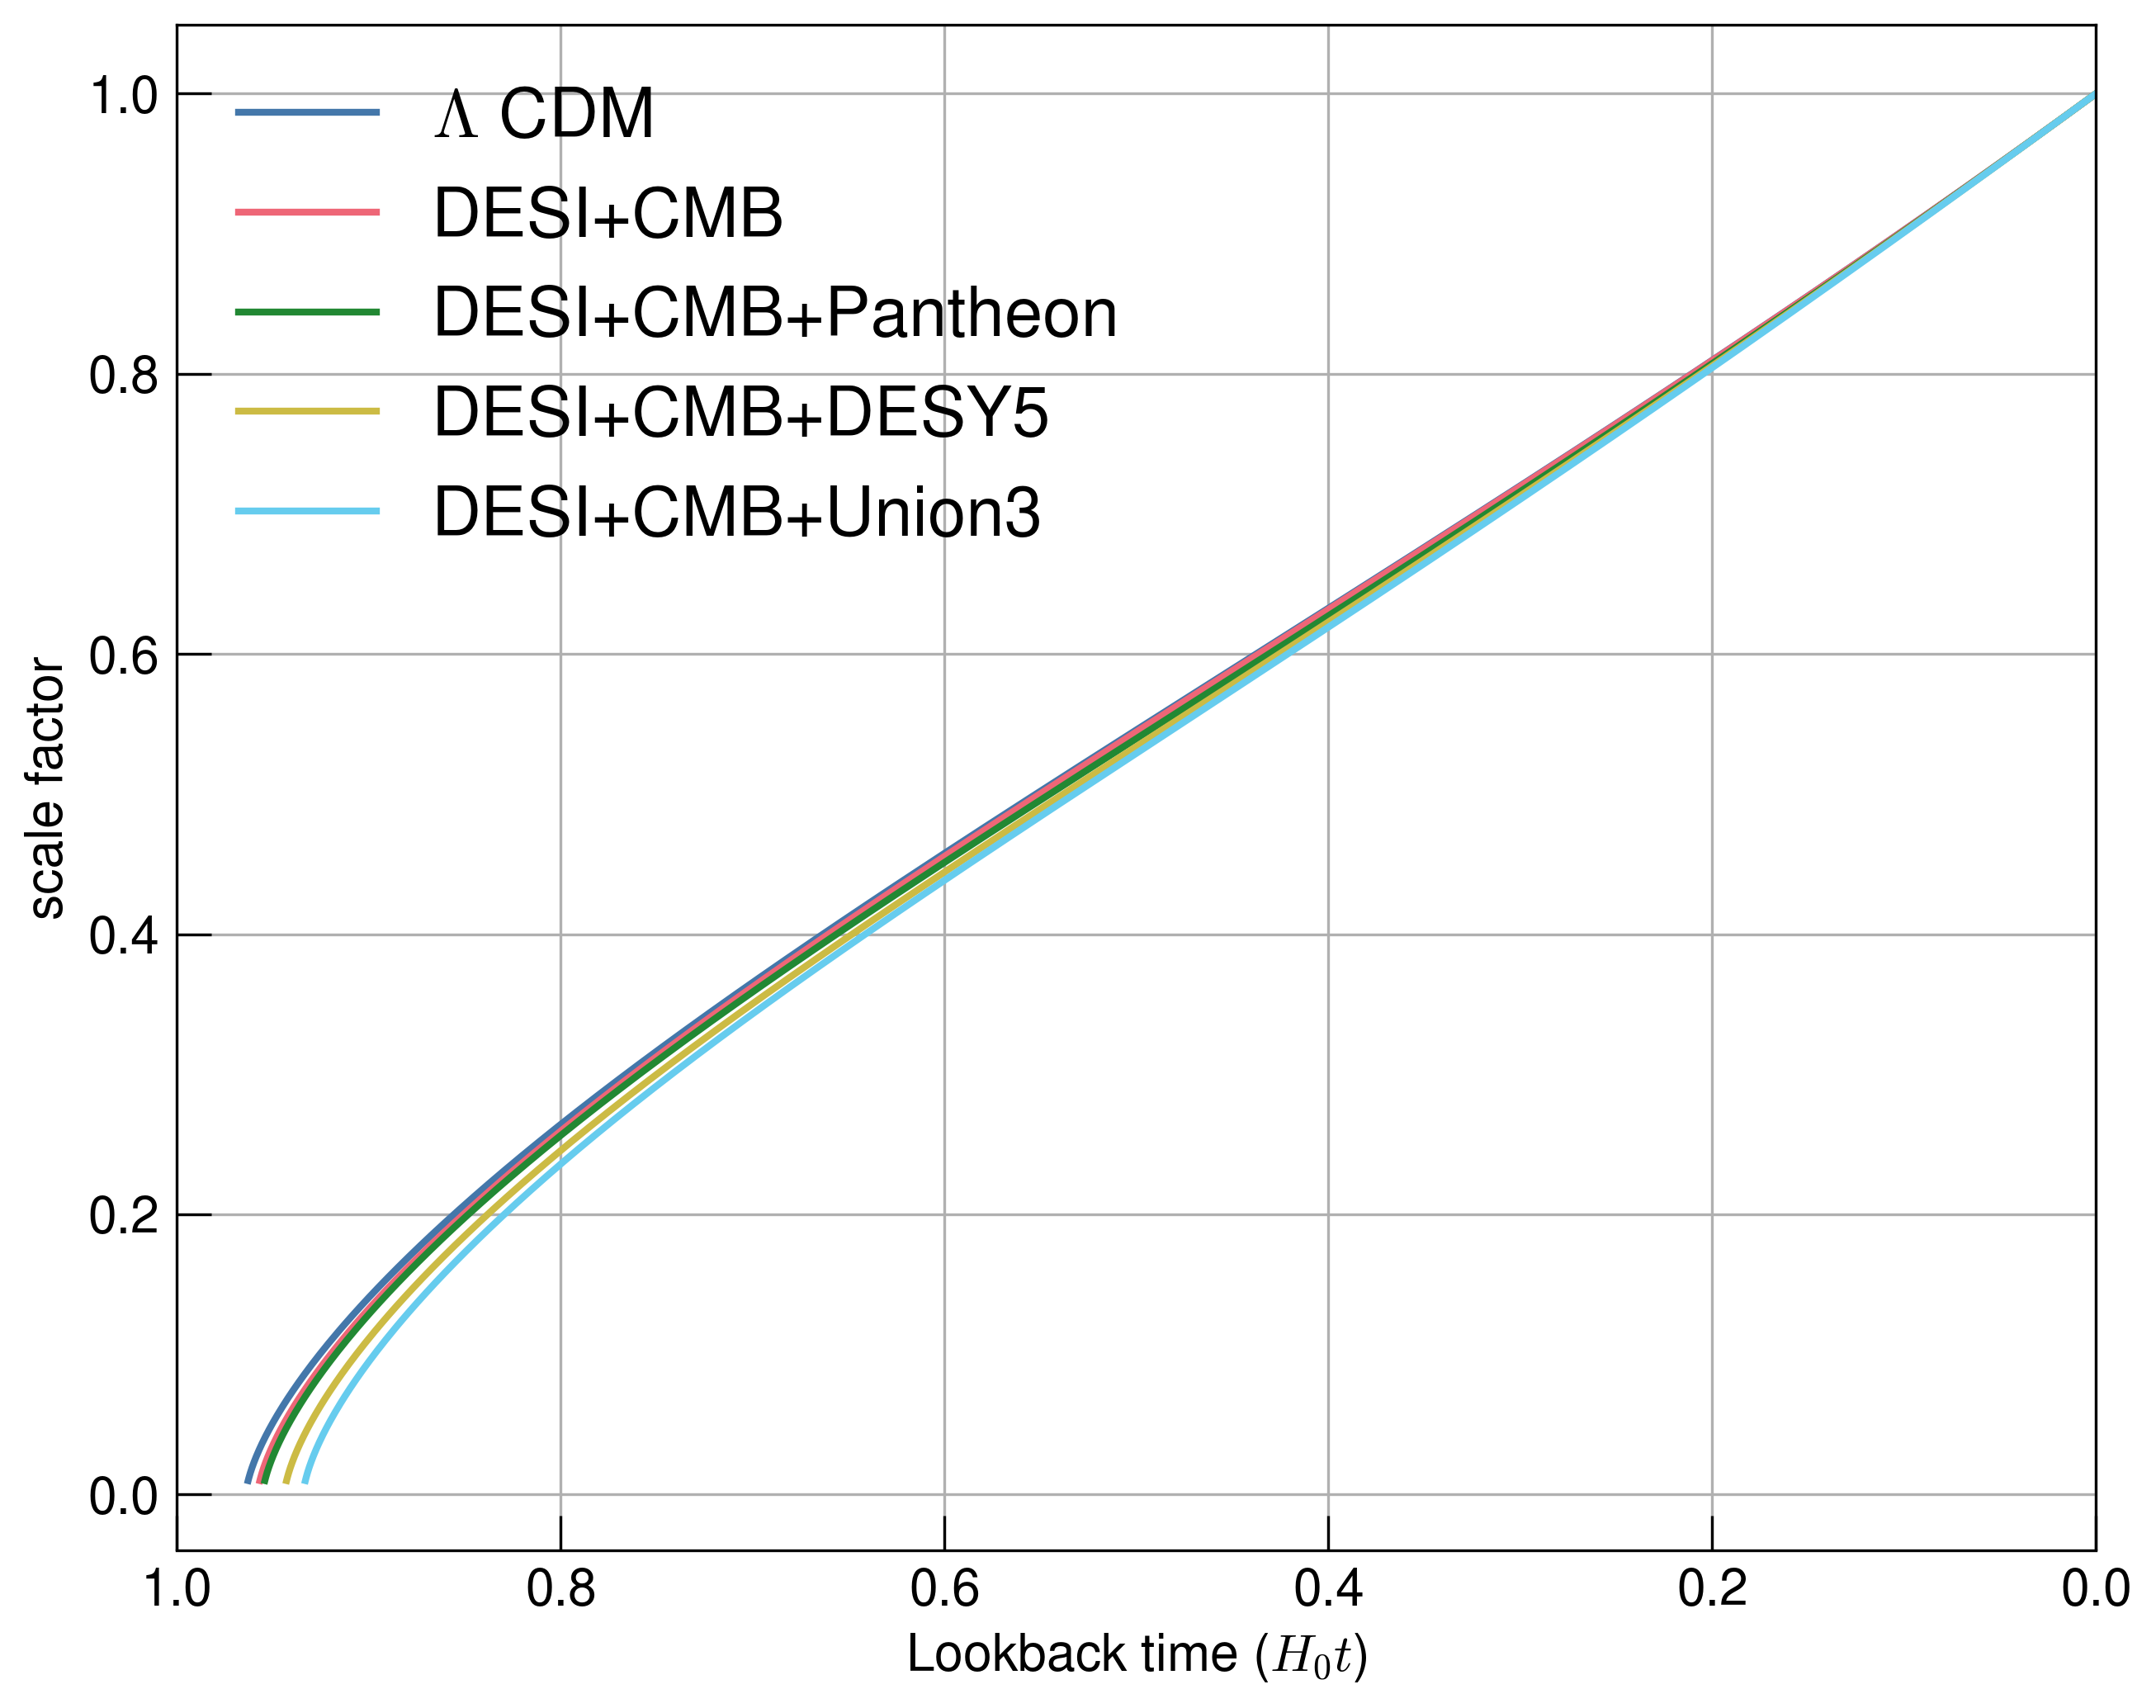

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1)

ax.plot(time_look_Concordance, a_arr, label=strlabel_LCDM, lw=2)
ax.plot(time_look_DESI, a_arr, label=strlabel_DESI, lw=2)
ax.plot(time_look_Pantheon, a_arr, label=strlabel_Pantheon, lw=2)
ax.plot(time_look_DESY5, a_arr, label=strlabel_DESY5, lw=2)
ax.plot(time_look_Union3, a_arr, label=strlabel_Union3, lw=2)


ax.set_xlabel(r"Lookback time ($H_0 t$)")
ax.set_ylabel("scale factor")

ax.set_xlim(1.0,0.)

ax.grid()

plt.legend()

In [11]:
agefn_Concordance = interpolate.interp1d(z_arr, time_ageGyr_Concordance)
agefn_DESI = interpolate.interp1d(z_arr, time_ageGyr_DESI)
agefn_Union3 = interpolate.interp1d(z_arr, time_ageGyr_Union3)
agefn_Pantheon = interpolate.interp1d(z_arr, time_ageGyr_Pantheon)
agefn_DESY5 = interpolate.interp1d(z_arr, time_ageGyr_DESY5)

scalefn_Concordance = interpolate.interp1d(time_look_Concordance, a_arr)

In [12]:
z_sample = np.array([z_arr[0], 2., 4., 6., 8., 10., 12.0, 14.0, 16.0])

for z in z_sample:
    print(f"Age of Universe at redshift {z:.4f} for Lambda-CDM is {agefn_Concordance(z):.4f} Gyrs")
    print(f"Age of Universe at redshift {z:.4f} for DESI is {agefn_DESI(z):.4f} Gyrs")
    print(f"Age of Universe at redshift {z:.4f} for Union3 is {agefn_Union3(z):.4f} Gyrs")
    print(f"Age of Universe at redshift {z:.4f} for Pantheon is {agefn_Pantheon(z):.4f} Gyrs")
    print(f"Age of Universe at redshift {z:.4f} for DESY5 is {agefn_DESY5(z):.4f} Gyrs")
    print("\n\n")

Age of Universe at redshift 0.0001 for Lambda-CDM is 13.4749 Gyrs
Age of Universe at redshift 0.0001 for DESI is 13.8524 Gyrs
Age of Universe at redshift 0.0001 for Union3 is 13.7385 Gyrs
Age of Universe at redshift 0.0001 for Pantheon is 13.7395 Gyrs
Age of Universe at redshift 0.0001 for DESY5 is 13.7362 Gyrs



Age of Universe at redshift 2.0000 for Lambda-CDM is 3.2293 Gyrs
Age of Universe at redshift 2.0000 for DESI is 3.3046 Gyrs
Age of Universe at redshift 2.0000 for Union3 is 3.3018 Gyrs
Age of Universe at redshift 2.0000 for Pantheon is 3.2986 Gyrs
Age of Universe at redshift 2.0000 for DESY5 is 3.3009 Gyrs



Age of Universe at redshift 4.0000 for Lambda-CDM is 1.5173 Gyrs
Age of Universe at redshift 4.0000 for DESI is 1.5522 Gyrs
Age of Universe at redshift 4.0000 for Union3 is 1.5426 Gyrs
Age of Universe at redshift 4.0000 for Pantheon is 1.5430 Gyrs
Age of Universe at redshift 4.0000 for DESY5 is 1.5429 Gyrs



Age of Universe at redshift 6.0000 for Lambda-CDM is 0.9178 Gy

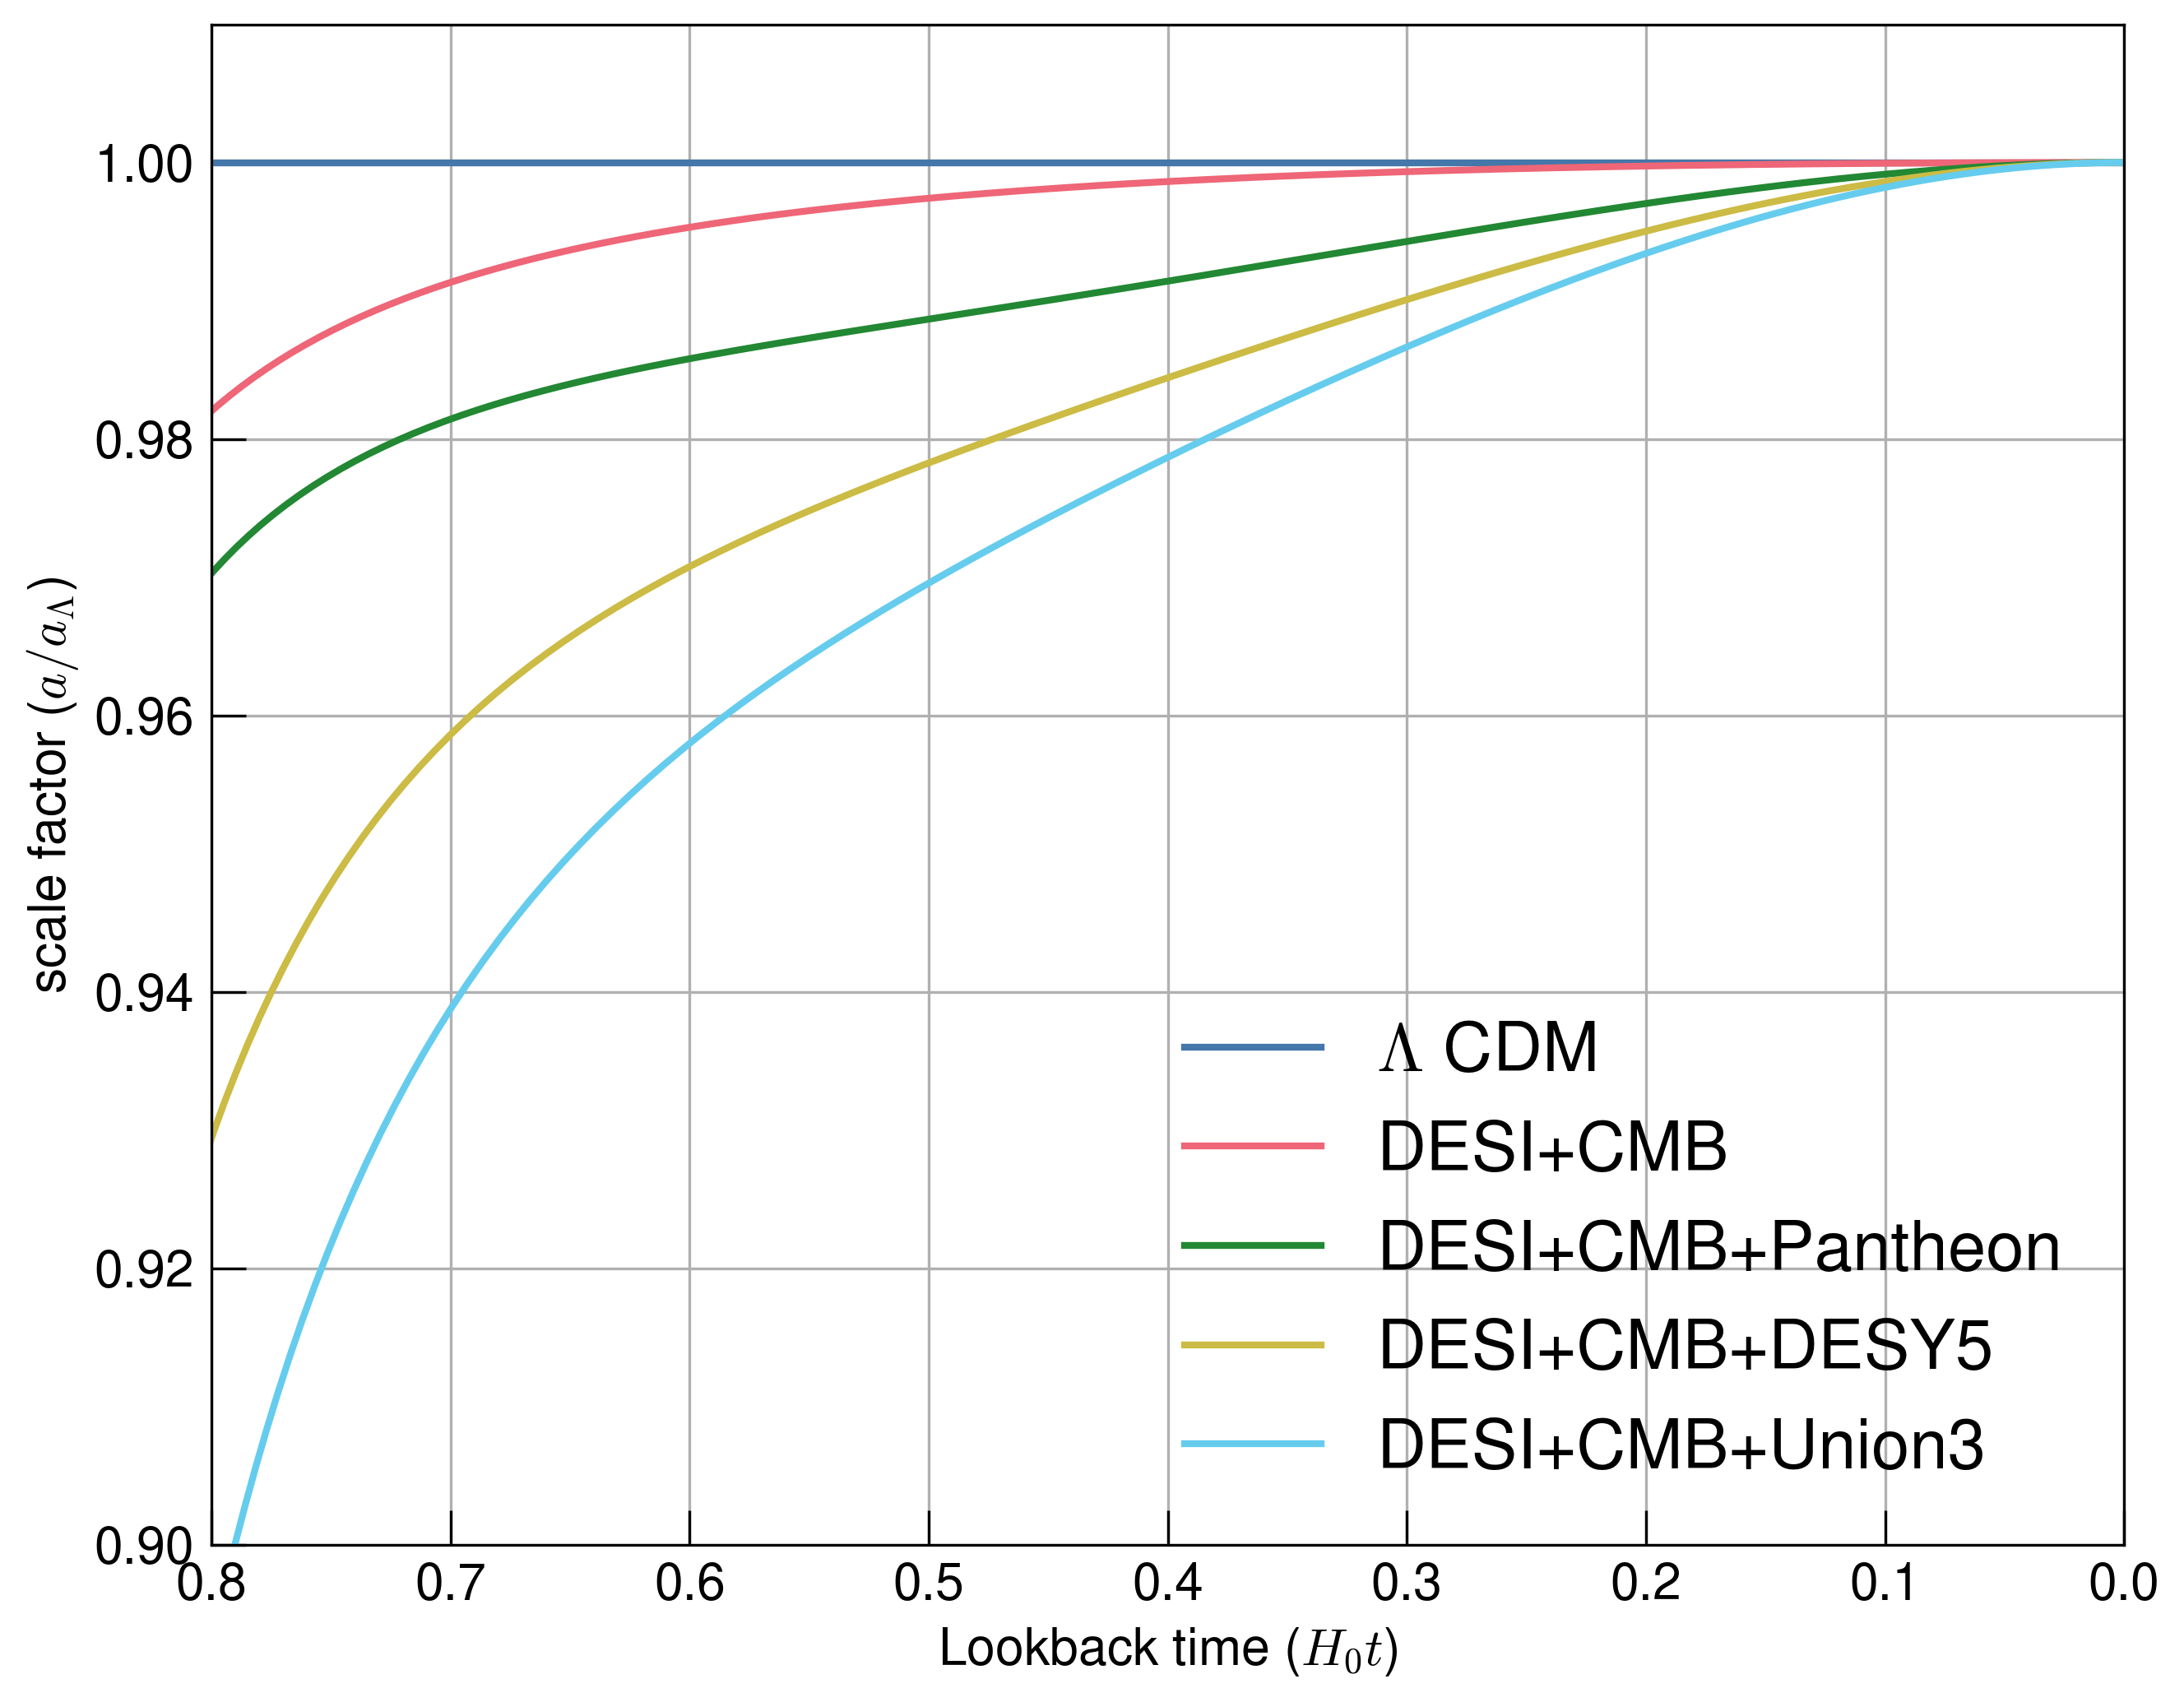

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=1)

ax.plot(time_look_Concordance[1:], a_arr[1:]/scalefn_Concordance(time_look_Concordance[1:]), label=strlabel_LCDM, lw=2)
ax.plot(time_look_DESI[1:], a_arr[1:]/scalefn_Concordance(time_look_DESI[1:]), label=strlabel_DESI, lw=2)
ax.plot(time_look_Pantheon[1:], a_arr[1:]/scalefn_Concordance(time_look_Pantheon[1:]), label=strlabel_Pantheon, lw=2)
ax.plot(time_look_DESY5[1:], a_arr[1:]/scalefn_Concordance(time_look_DESY5[1:]), label=strlabel_DESY5, lw=2)
ax.plot(time_look_Union3[1:], a_arr[1:]/scalefn_Concordance(time_look_Union3[1:]), label=strlabel_Union3, lw=2)


ax.set_xlabel(r"Lookback time ($H_0 t$)")
ax.set_ylabel("scale factor ($a / a_{\Lambda}$)")

# ax.set_xlim(1.0,0.)
ax.set_xlim(0.8,0.)
ax.set_ylim(0.90, 1.01)

ax.grid()


plt.legend()

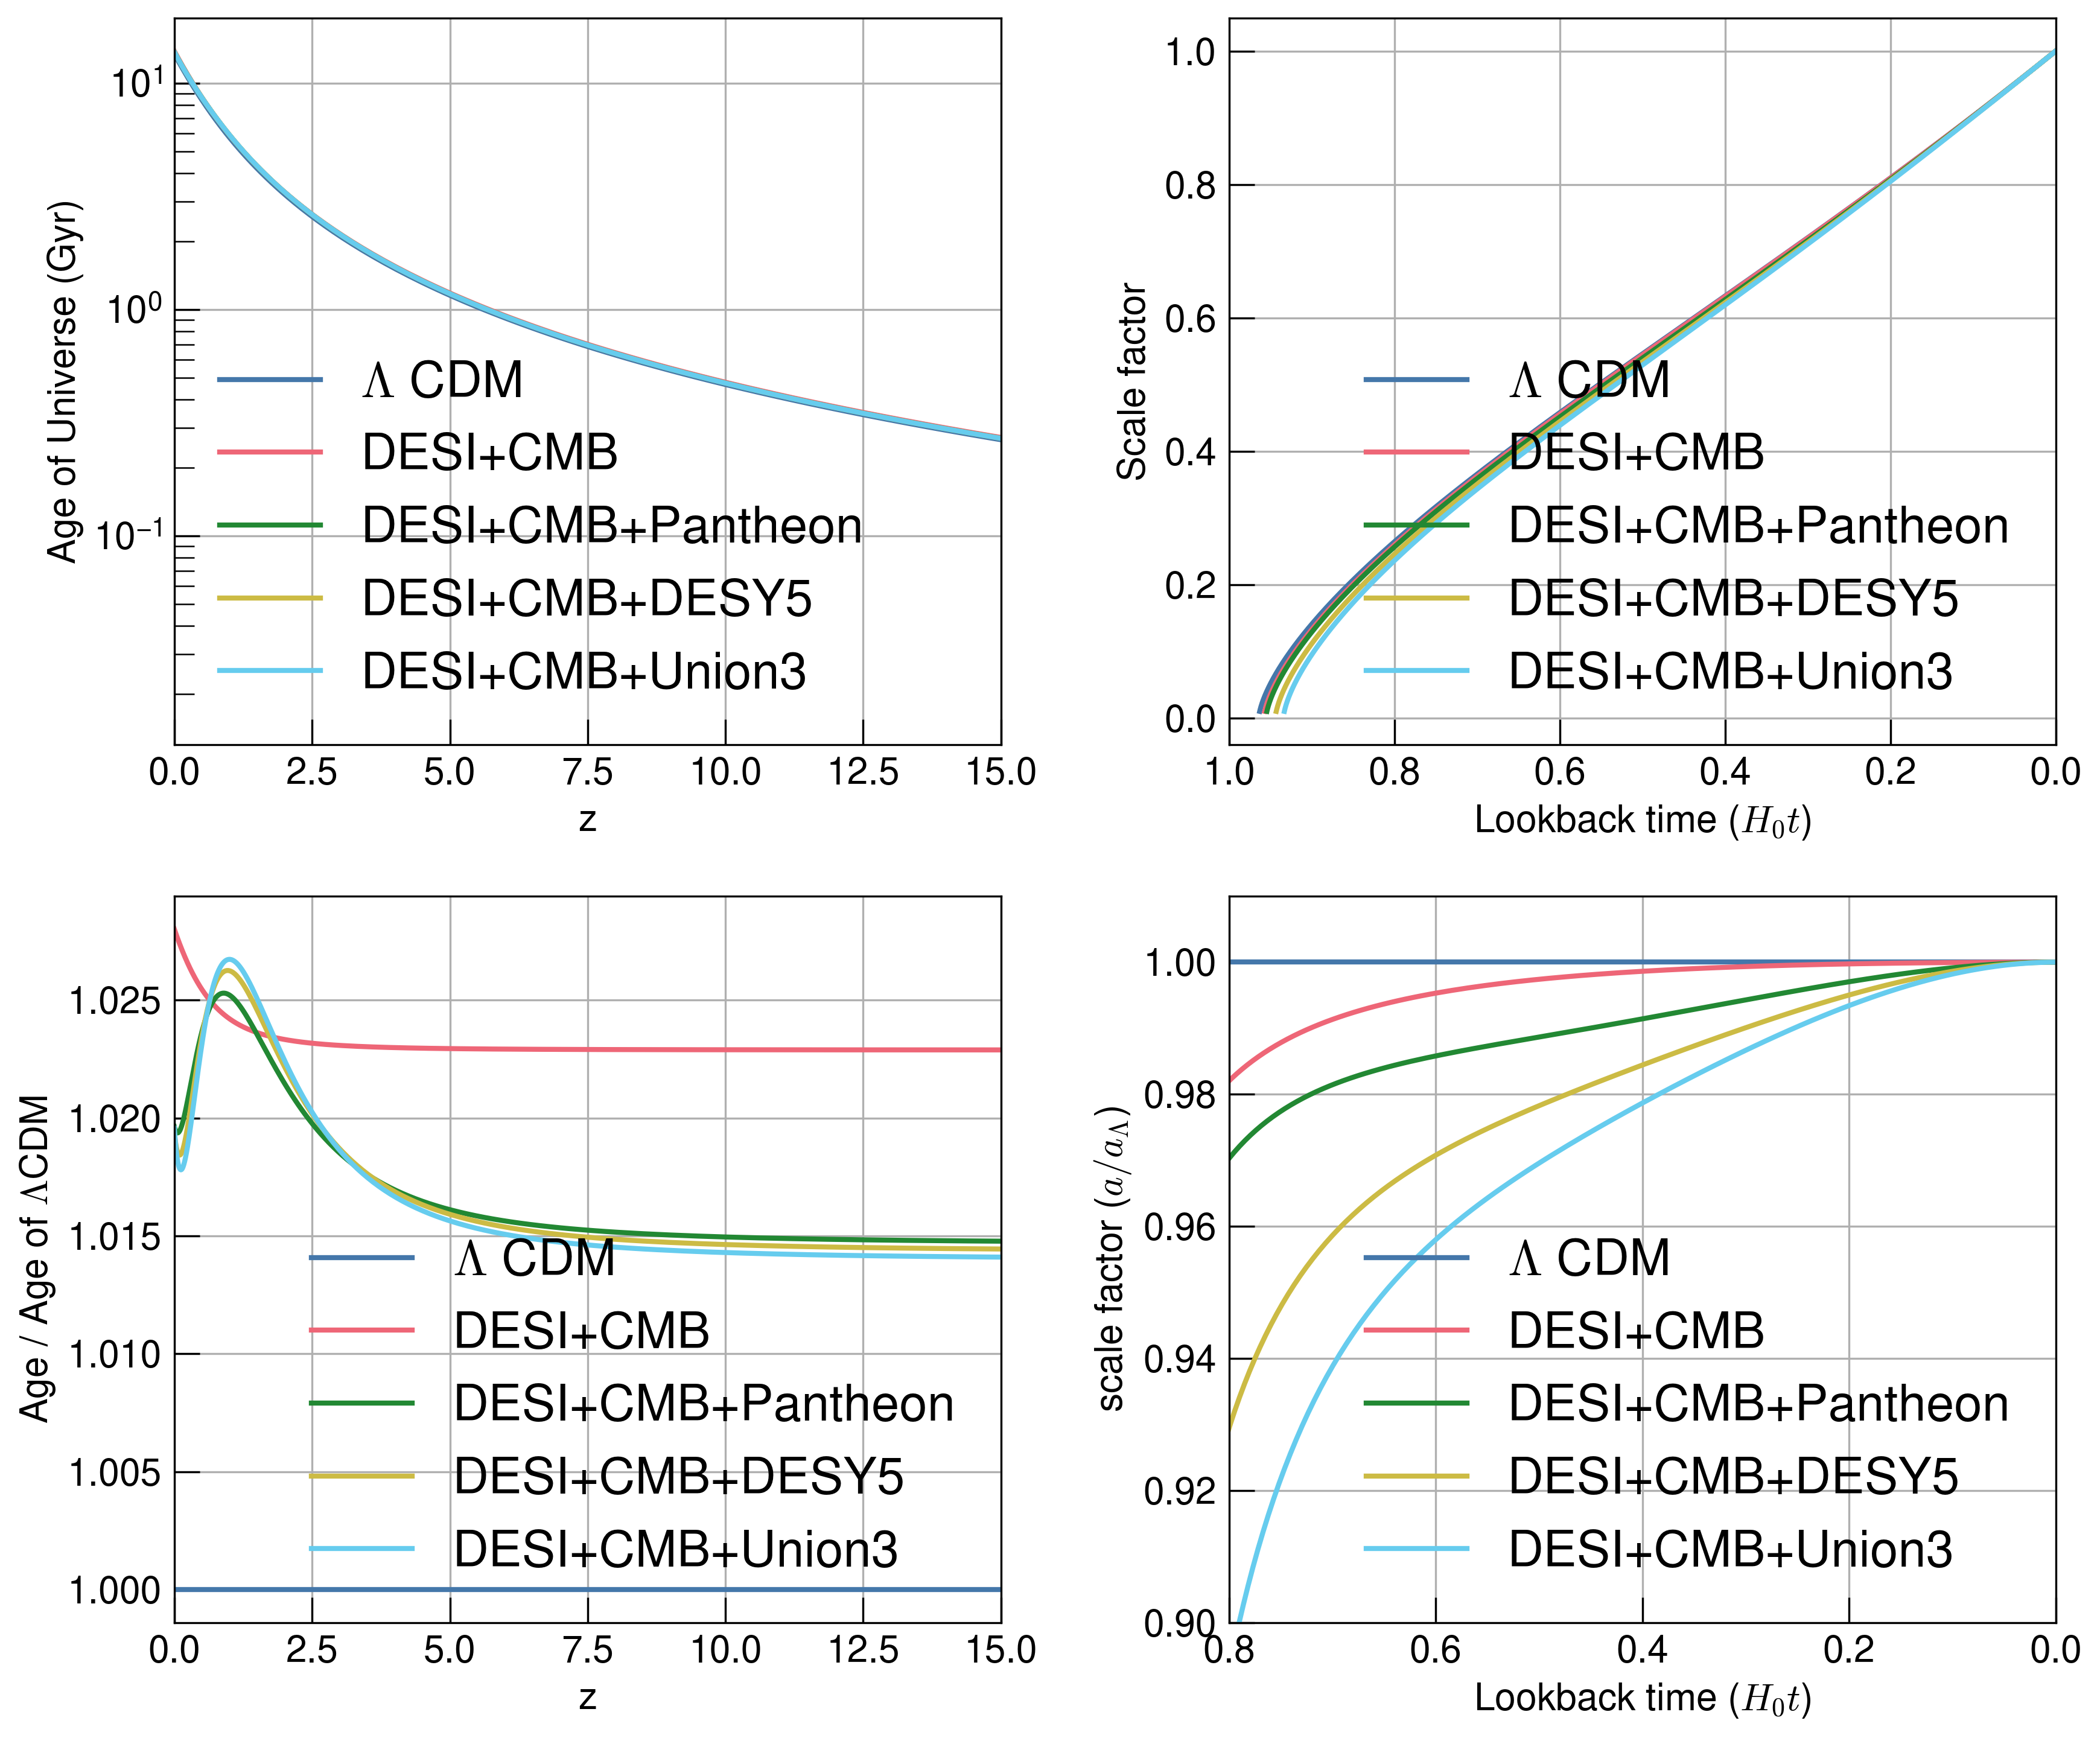

In [14]:
fig, ax = plt.subplots(figsize=(12,10), nrows=2, ncols=2)

ax[0,0].plot(z_arr, time_ageGyr_Concordance, label=strlabel_LCDM, lw=2)
ax[0,0].plot(z_arr, time_ageGyr_DESI, label=strlabel_DESI, lw=2)
ax[0,0].plot(z_arr, time_ageGyr_Pantheon, label=strlabel_Pantheon, lw=2)
ax[0,0].plot(z_arr, time_ageGyr_DESY5, label=strlabel_DESY5, lw=2)
ax[0,0].plot(z_arr, time_ageGyr_Union3, label=strlabel_Union3, lw=2)

ax[0,0].set_xlim(0.,15.)

ax[0,0].set_xlabel("z")
ax[0,0].set_yscale('log')
ax[0,0].set_ylabel("Age of Universe (Gyr)")

ax[0,0].legend()
ax[0,0].grid()


##
ax[1,0].plot(z_arr, time_ageGyr_Concordance/agefn_Concordance(z_arr), label=strlabel_LCDM, lw=2)
ax[1,0].plot(z_arr, time_ageGyr_DESI/agefn_Concordance(z_arr), label=strlabel_DESI, lw=2)
ax[1,0].plot(z_arr, time_ageGyr_Pantheon/agefn_Concordance(z_arr), label=strlabel_Pantheon, lw=2)
ax[1,0].plot(z_arr, time_ageGyr_DESY5/agefn_Concordance(z_arr), label=strlabel_DESY5, lw=2)
ax[1,0].plot(z_arr, time_ageGyr_Union3/agefn_Concordance(z_arr), label=strlabel_Union3, lw=2)

ax[1,0].set_xlim(0.,15.)

ax[1,0].set_xlabel("z")
ax[1,0].set_ylabel("Age / Age of $\Lambda$CDM")

ax[1,0].legend()
ax[1,0].grid()
##


ax[0,1].plot(time_look_Concordance, a_arr, label=strlabel_LCDM, lw=2)
ax[0,1].plot(time_look_DESI, a_arr, label=strlabel_DESI, lw=2)
ax[0,1].plot(time_look_Pantheon, a_arr, label=strlabel_Pantheon, lw=2)
ax[0,1].plot(time_look_DESY5, a_arr, label=strlabel_DESY5, lw=2)
ax[0,1].plot(time_look_Union3, a_arr, label=strlabel_Union3, lw=2)

ax[0,1].set_xlabel(r"Lookback time ($H_0 t$)")
ax[0,1].set_ylabel("Scale factor")
ax[0,1].set_xlim(1.0,0.)

ax[0,1].legend()
ax[0,1].grid()


ax[1,1].plot(time_look_Concordance[1:], a_arr[1:]/scalefn_Concordance(time_look_Concordance[1:]), label=strlabel_LCDM, lw=2)
ax[1,1].plot(time_look_DESI[1:], a_arr[1:]/scalefn_Concordance(time_look_DESI[1:]), label=strlabel_DESI, lw=2)
ax[1,1].plot(time_look_Pantheon[1:], a_arr[1:]/scalefn_Concordance(time_look_Pantheon[1:]), label=strlabel_Pantheon, lw=2)
ax[1,1].plot(time_look_DESY5[1:], a_arr[1:]/scalefn_Concordance(time_look_DESY5[1:]), label=strlabel_DESY5, lw=2)
ax[1,1].plot(time_look_Union3[1:], a_arr[1:]/scalefn_Concordance(time_look_Union3[1:]), label=strlabel_Union3, lw=2)

ax[1,1].set_xlabel(r"Lookback time ($H_0 t$)")
ax[1,1].set_ylabel("scale factor ($a / a_{\Lambda}$)")

ax[1,1].set_xlim(0.8,0.)
ax[1,1].set_ylim(0.90, 1.01)

ax[1,1].legend()
ax[1,1].grid()

plt.tight_layout()